https://towardsdatascience.com/how-to-create-a-lipstick-chart-with-matplotlib-2fde5412fee9

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib.lines import Line2D

In [2]:
FONT_FAMILY = "serif"
BACKGROUND_COLOR = "#FAE8E0"
TEXT_COLOR = "#33261D"
BAR_COLOR = "#EF7C8E"

sns.set_style({
    "axes.facecolor": BACKGROUND_COLOR,
    "figure.facecolor": BACKGROUND_COLOR,
    "text.color": TEXT_COLOR,
    "font.family": FONT_FAMILY,
    "xtick.bottom": False,
    "xtick.top": False,
    "ytick.left": False,
    "ytick.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "axes.spines.right": False,
    "axes.spines.top": False,
})

In [3]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/oscarleoo/matplotlib-tutorial-data/main/mortality-and-decease.csv"
)

In [4]:
def add_bars(ax, x, width, alpha, label):
    sns.barplot(
        ax=ax, x=x, y=[i for i in range(len(x))], label=label,
        width=width, alpha=alpha,
        color=BAR_COLOR,
        edgecolor=TEXT_COLOR,
        orient="h"
    )

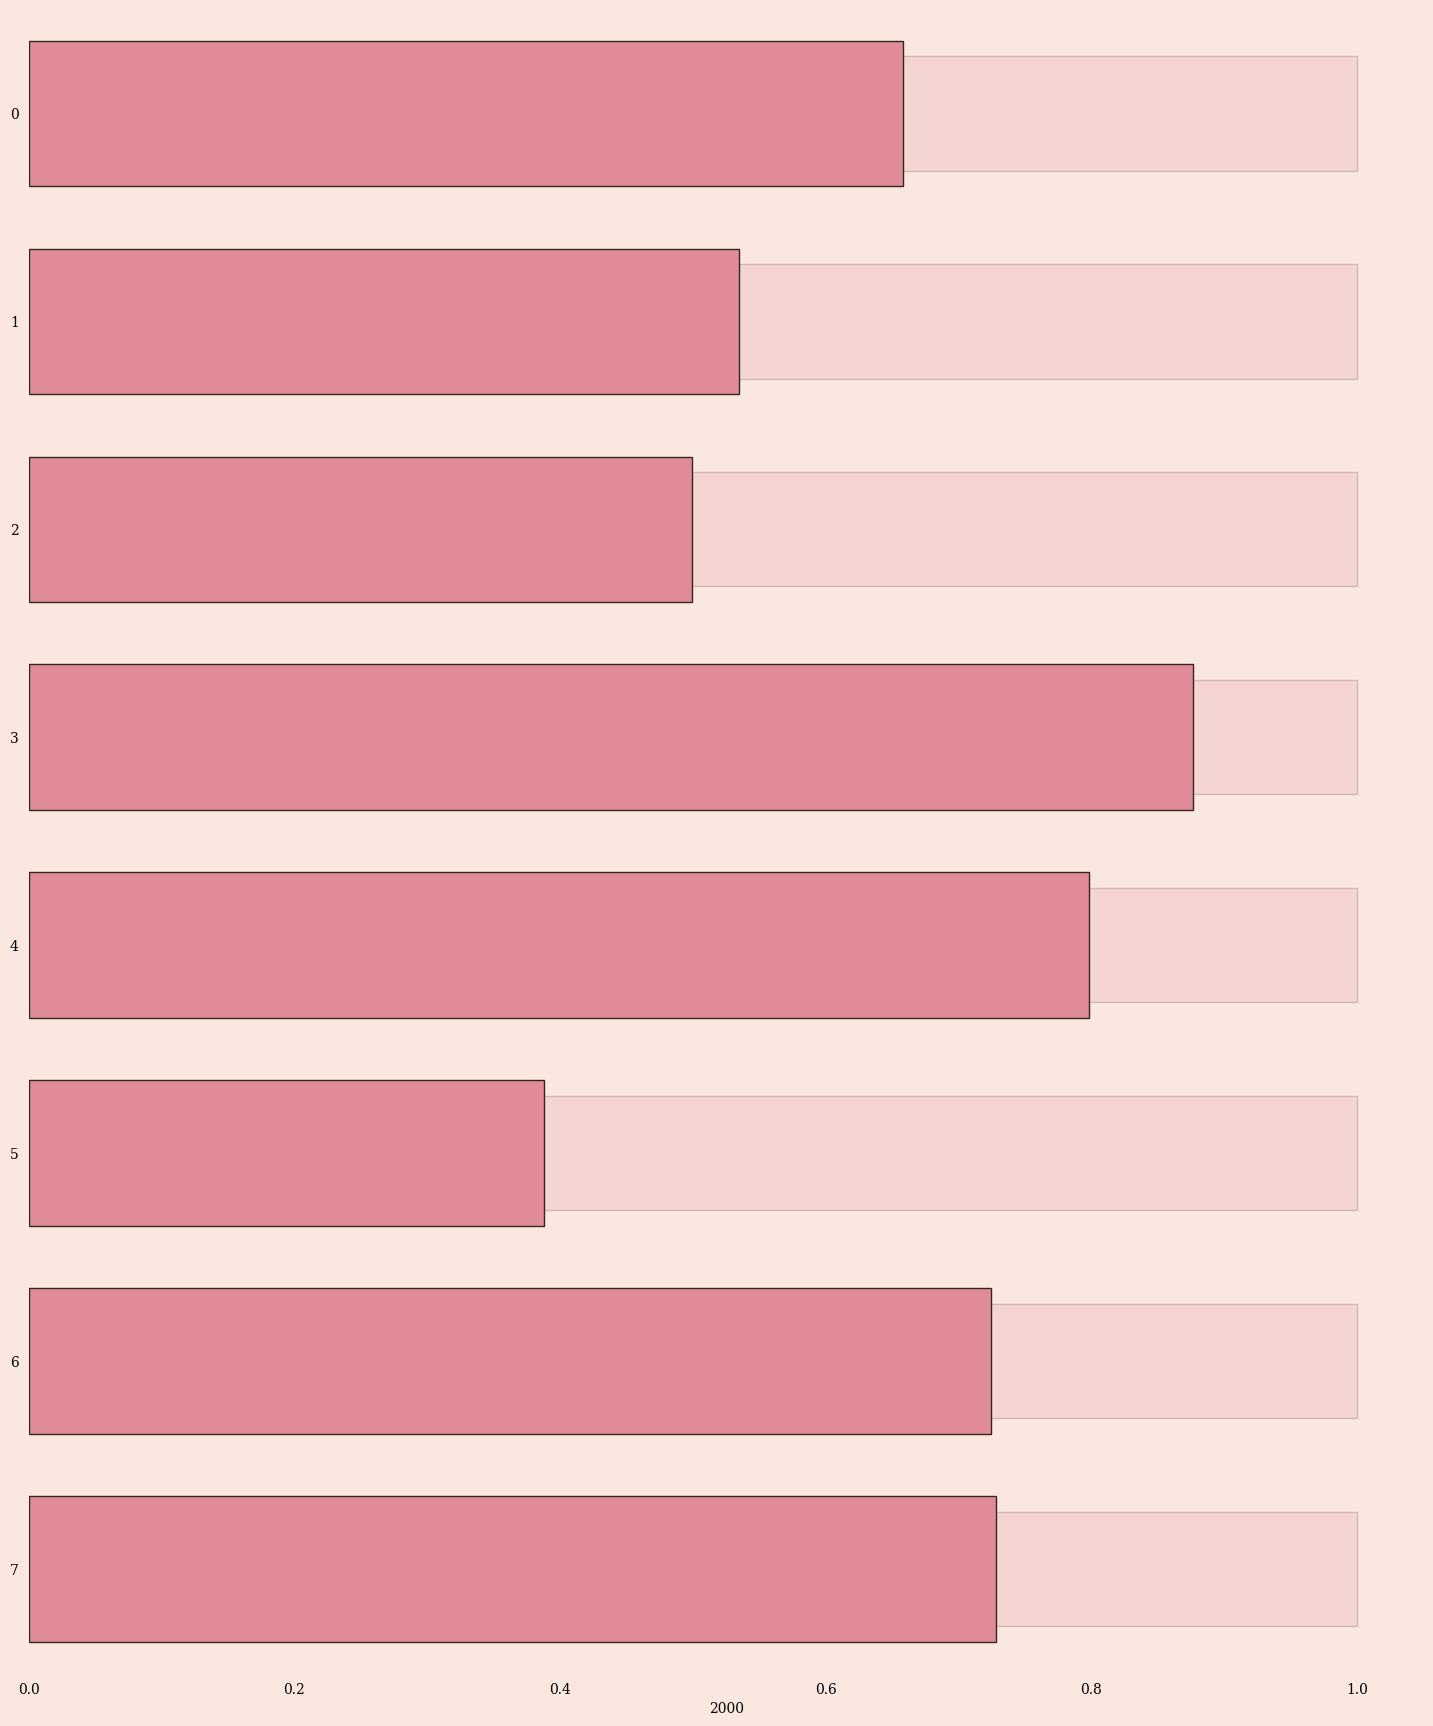

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 2.7 * len(df)))

add_bars(
    ax=ax, x=df["2000"] / df["2000"],
    width=0.55, alpha=0.2, label="2000"
)
add_bars(
    ax=ax, x=df["latest_value"] / df["2000"],
    width=0.7, alpha=1, label="Latest"
)

In [6]:
def split_name(name, limit=20):
    split = name.split()
    s = ""
    for s_ in split:
        if len(s.split("\n")[-1] + s_) > limit:
            s += "\n" + s_
        else:
            s += " " + s_
    return s.strip()

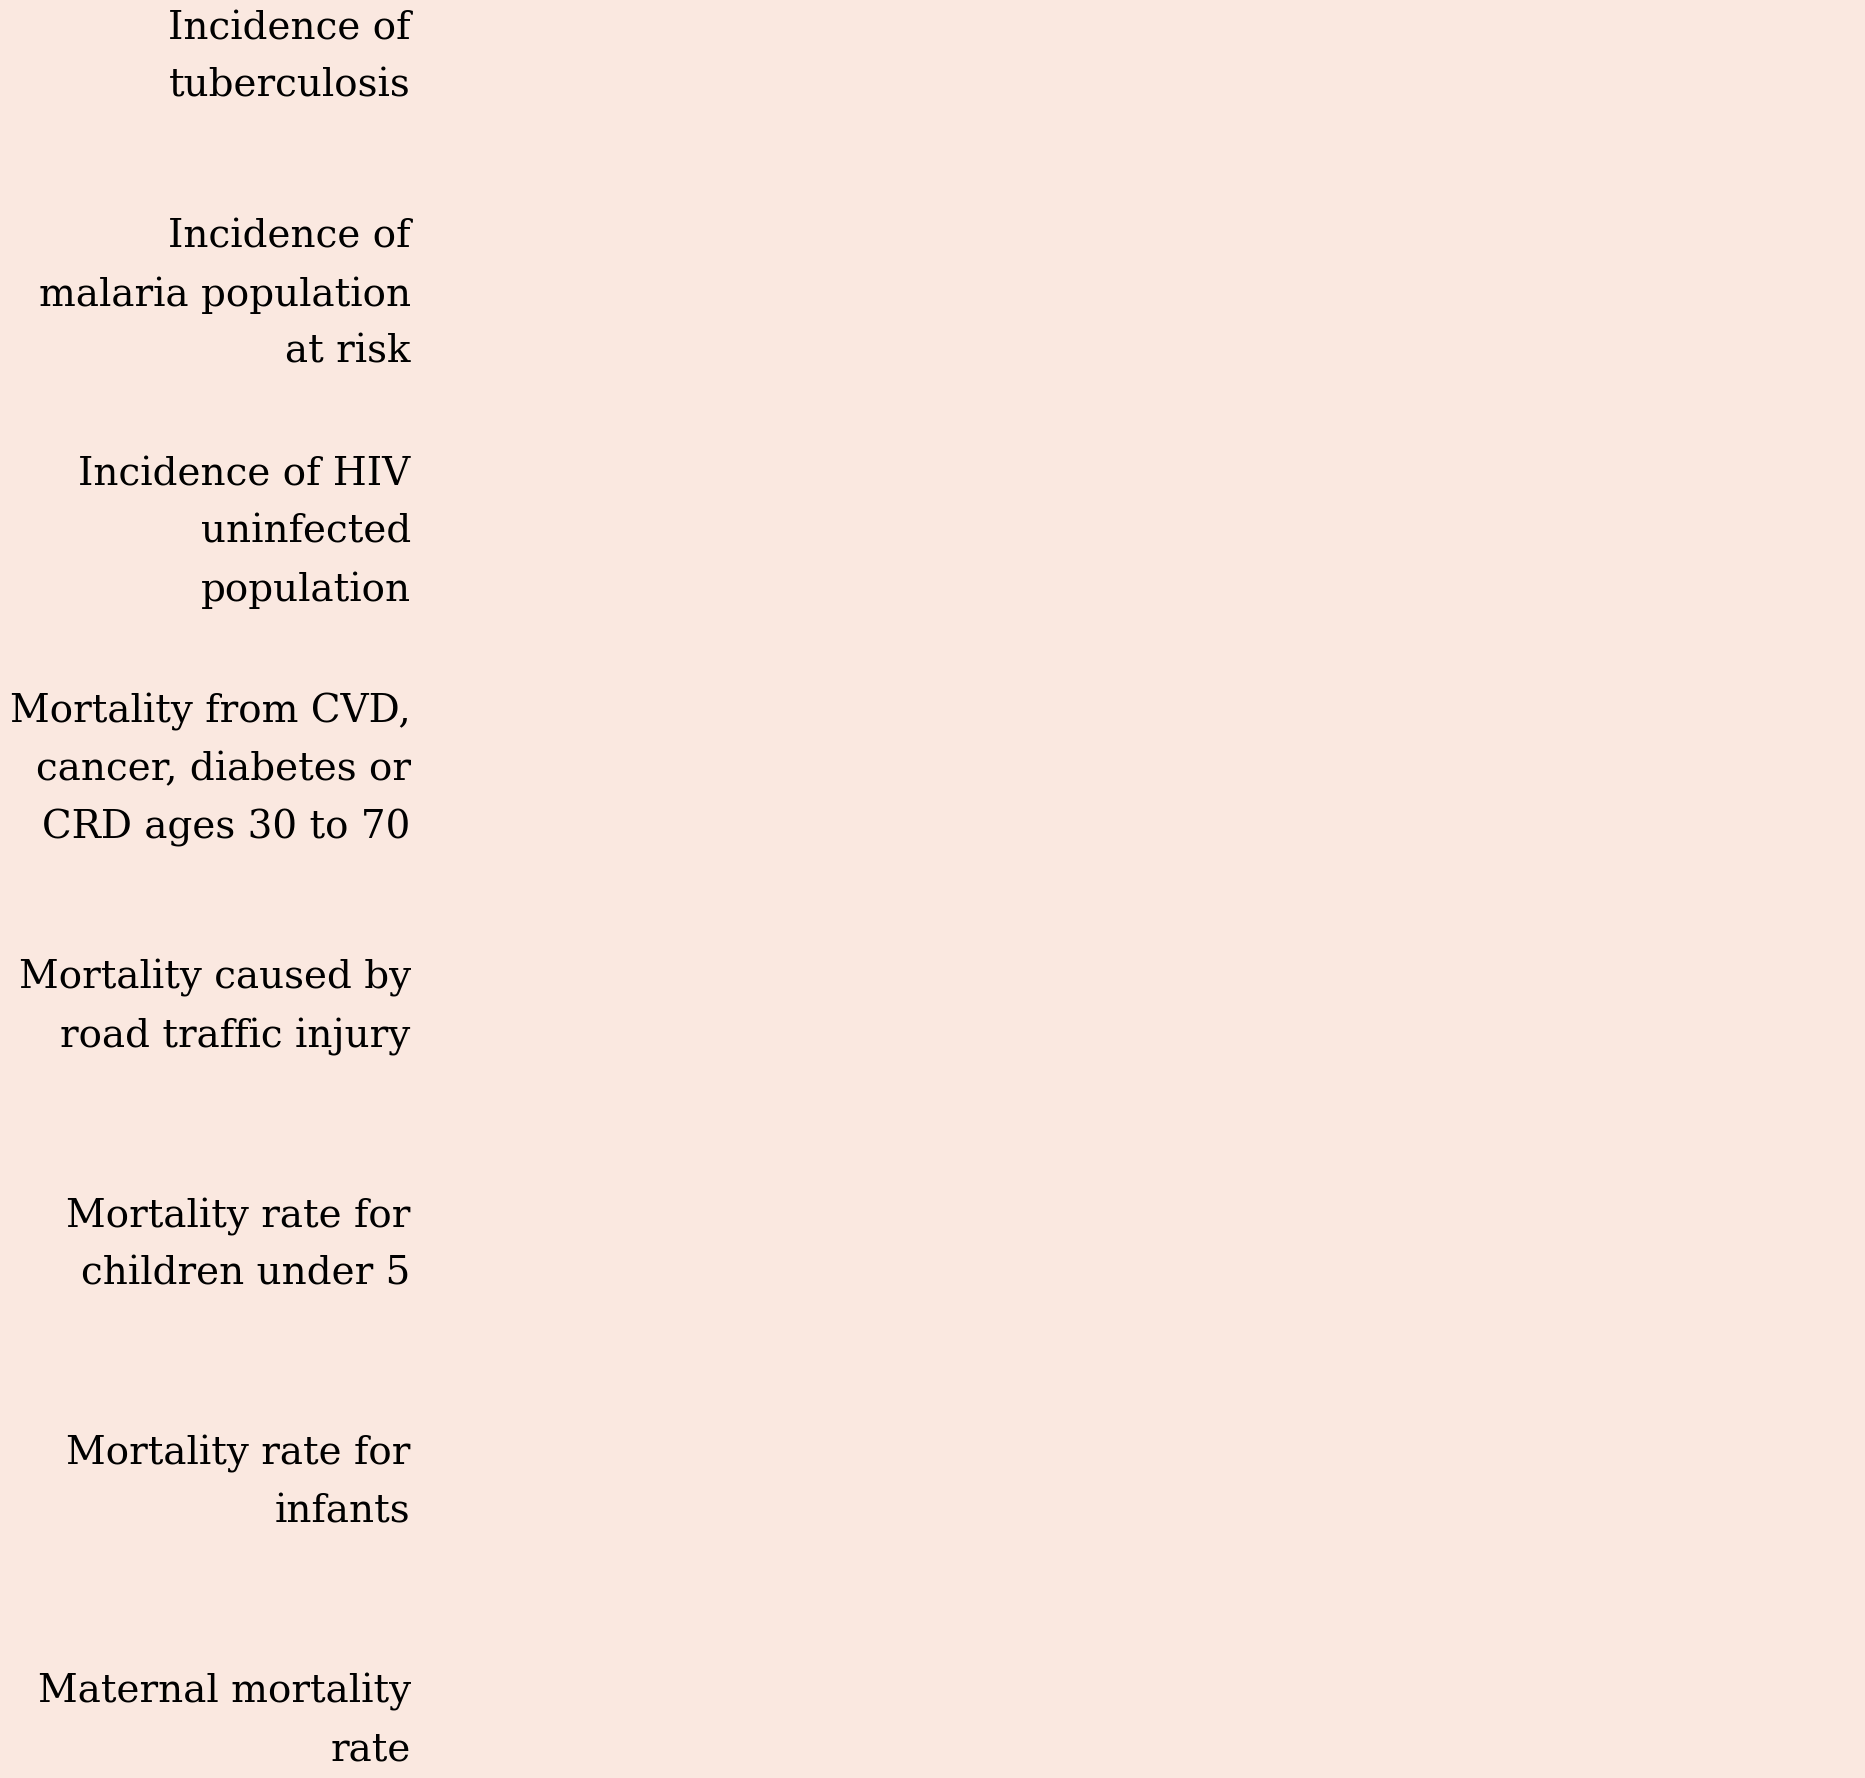

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 2.7 * len(df)))


ax.set(xlabel=None, ylabel=None, xticks=[])
ax.tick_params("y", labelsize=28, pad=32)
ax.tick_params("x", labelsize=20, pad=16)

ax.set_yticks(
    ticks=[i for i in range(len(df))],
    labels=[split_name(n, limit=19) for n in df["indicator_name"]],
    linespacing=1.7, va="center"
)

In [9]:
def add_info_text(ax, row, index):
    value = round(row["latest_value"], 1)
    per = row["per"]
    year = row["latest_year"]
    text = "{:,} out of\n{:,} ({})".format(value, per, year)

    ax.annotate(
        text=text, 
        xy=(0.02, index), 
        color="#fff", 
        fontsize=24,
        va="center", 
        linespacing=1.7
    )

In [10]:
def add_change_text(ax, row, index):
    change = round(100 * row["change"], 1)
    text = "{:,}%".format(change)
    x = row["latest_value"] / row["2000"] + 0.02

    ax.annotate(
        text="{:,}%".format(change), xy=(x, index), fontsize=22,
        va="center",  linespacing=1.7
    )

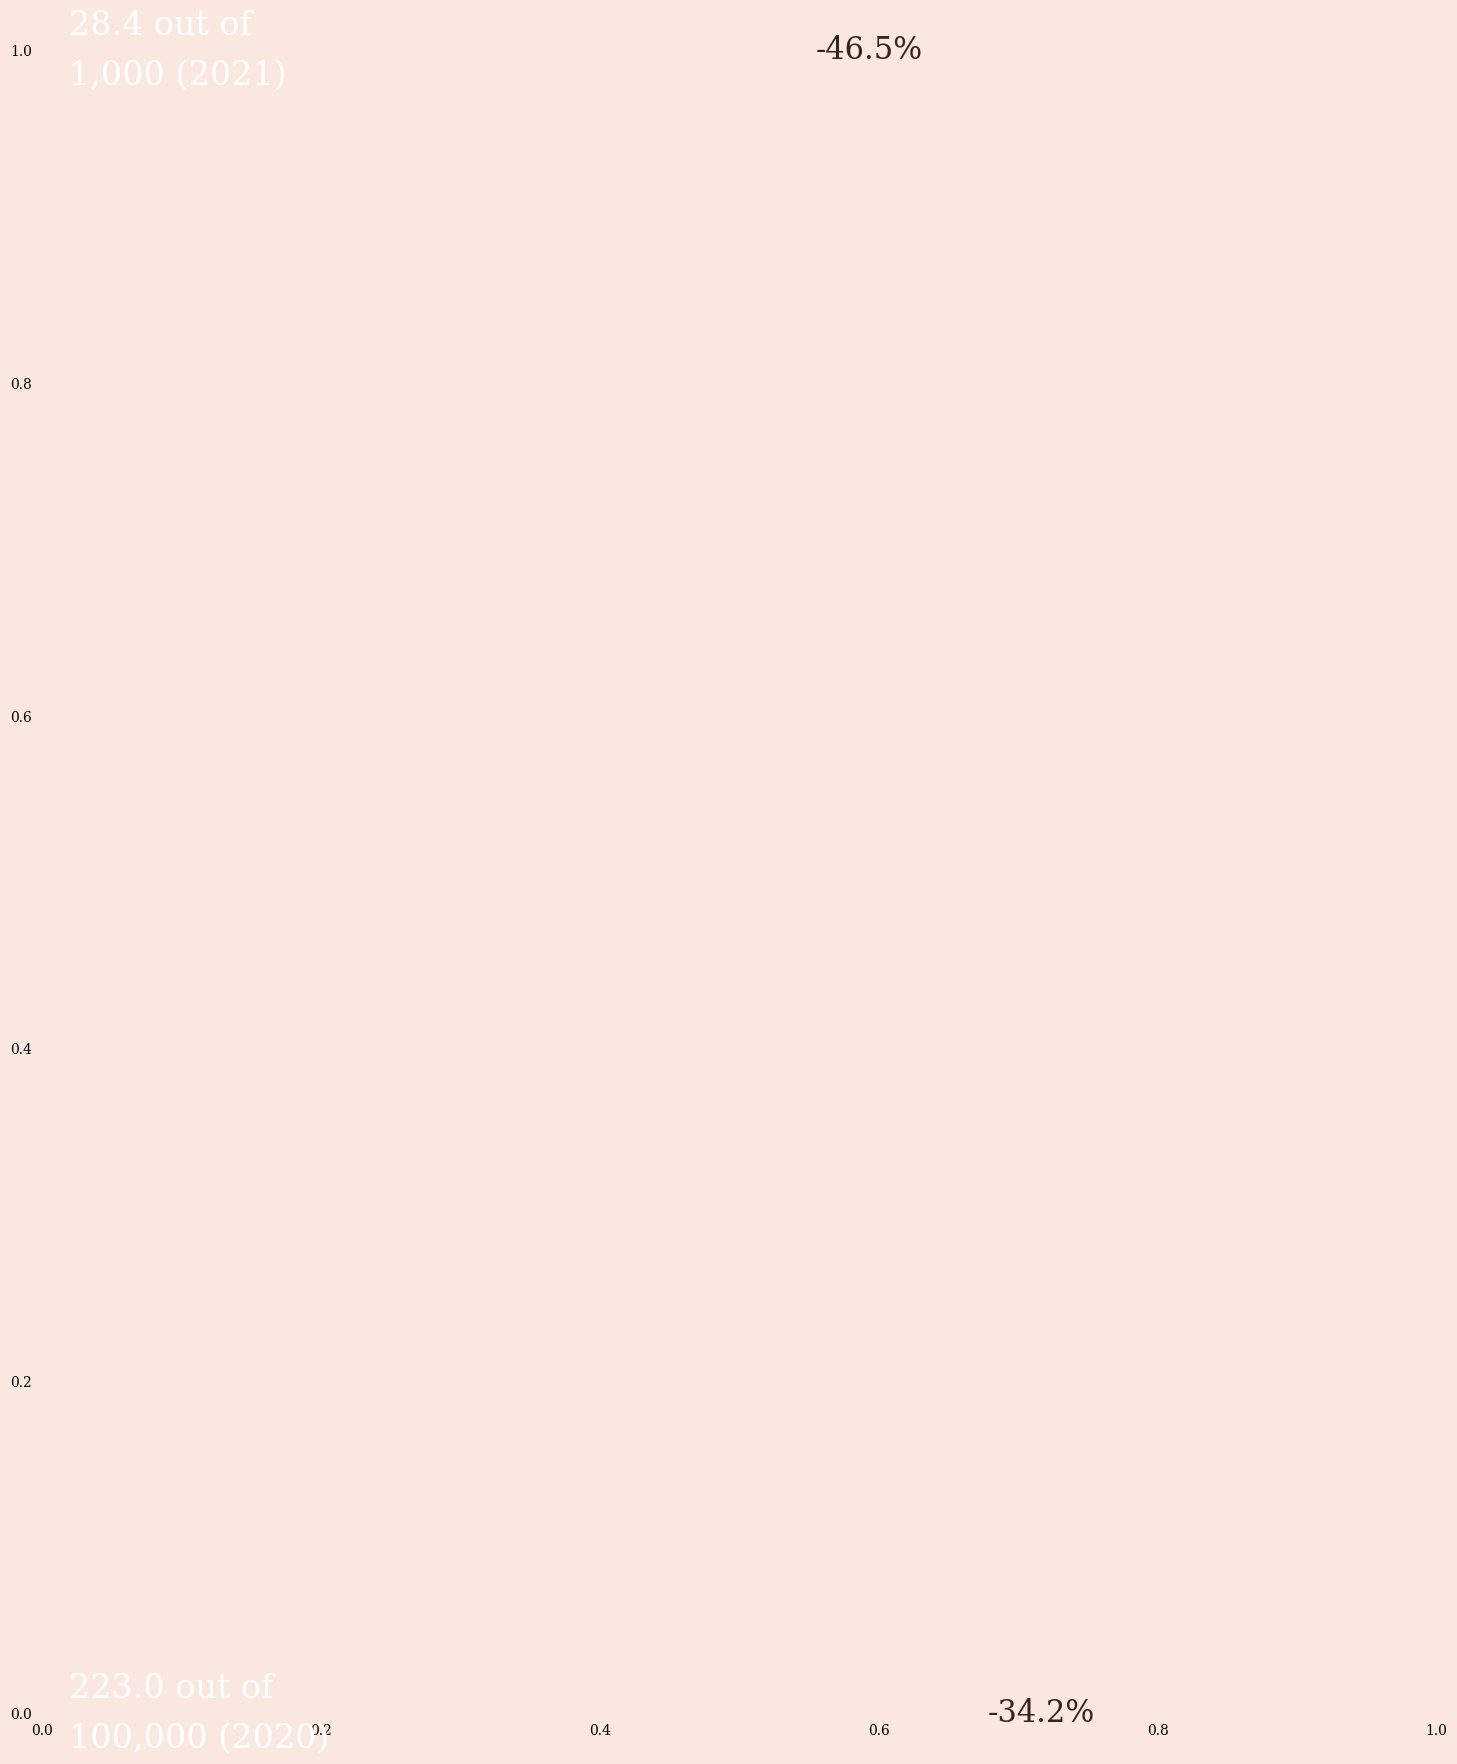

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 2.7 * len(df)))
...

for index, row in df.reset_index().iterrows():
    add_info_text(ax, row, index)
    add_change_text(ax, row, index)

In [13]:
def create_image_from_figure(fig):
    plt.tight_layout()

    fig.canvas.draw()
    data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    data = data.reshape((fig.canvas.get_width_height()[::-1]) + (3,))
    
    plt.close() 
    return Image.fromarray(data)

In [14]:
def add_padding_to_chart(chart, left, top, right, bottom, background):
    size = chart.size
    image = Image.new("RGB", (size[0] + left + right, size[1] + top + bottom), background)
    image.paste(chart, (left, top))
    return image

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 2.7 * len(df)))

add_bars(
    ax=ax, x=df["2000"] / df["2000"],
    width=0.55, alpha=0.2, label="2000"
)

add_bars(
    ax=ax, x=df["latest_value"] / df["2000"],
    width=0.7, alpha=1, label="Latest"
)

ax.set(xlabel=None, ylabel=None, xticks=[])
ax.tick_params("y", labelsize=28, pad=32)
ax.tick_params("x", labelsize=20, pad=16)

ax.set_yticks(
    ticks=[i for i in range(len(df))],
    labels=[split_name(n, limit=20) for n in df["indicator_name"]],
    linespacing=1.7, va="center"
)

for index, row in df.reset_index().iterrows():
    add_info_text(ax, row, index)
    add_change_text(ax, row, index)

line = Line2D([-0.35, 1.0], [-0.9, -0.9], color=TEXT_COLOR)
line.set_clip_on(False)
ax.add_artist(line)

title = "Lipstick Chart - Relative\nDecreases Compared\nto 2000"
plt.title(title, x=-0.32, y=1.11, fontsize=58, ha="left", linespacing=1.6)
plt.legend(bbox_to_anchor=(0.75, 1.14), loc='lower center', borderaxespad=0, ncol=1, fontsize=44, edgecolor="#FAE8E0")

image = create_image_from_figure(fig)
image = add_padding_to_chart(image, 20, 50, 10, 50, BACKGROUND_COLOR)

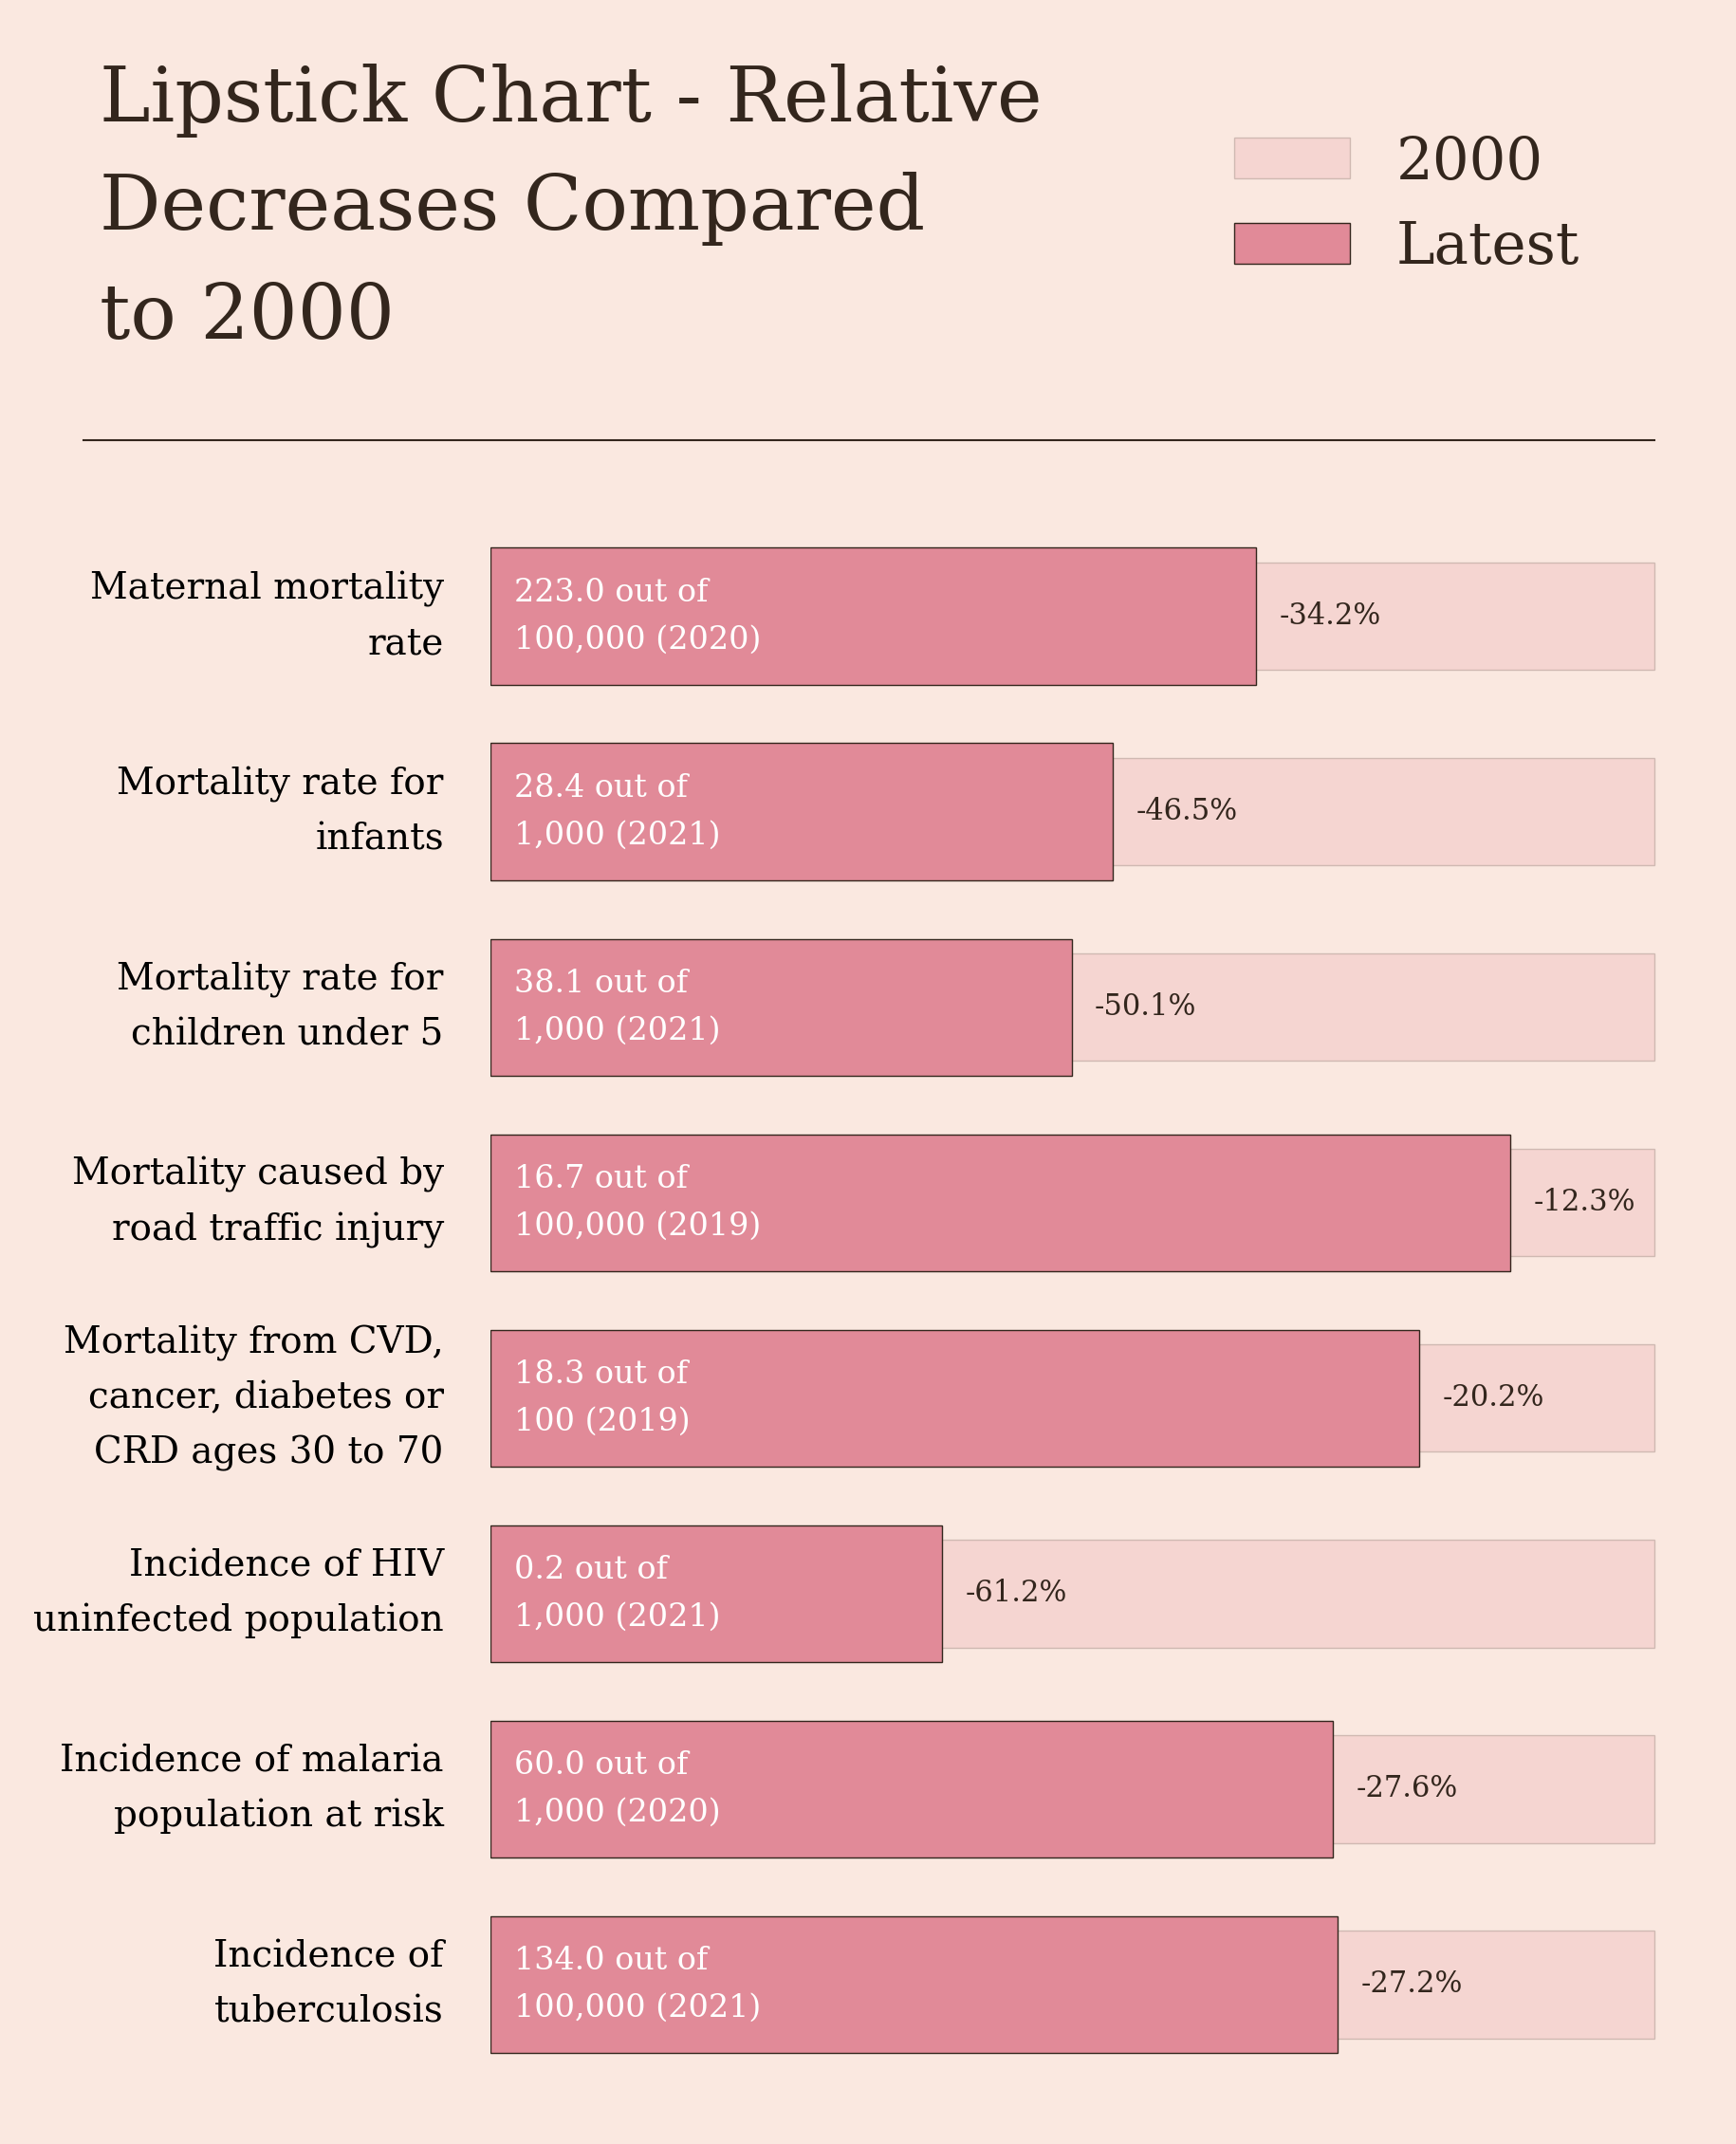

In [17]:
image